## Tutorial de Classificação Neural do banco de dados Iris

Autor: Natanael Junior (natmourajr@gmail.com)

Laboratorio de Processamento de Sinais - UFRJ

In [1]:
%time
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import cross_validation
from sklearn import preprocessing

from sklearn.cluster import KMeans

m_font_size = 20

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 8.11 µs


/home/natmourajr/.virtualenvs/se2017annecy2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%time
# import some data to play with
iris = datasets.load_iris()
data = iris.data # iris data
trgt = iris.target # iris data
iris_colors = ['b','r','g']
iris_labels = ['Setosa','Versicolor','Virginica']

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs


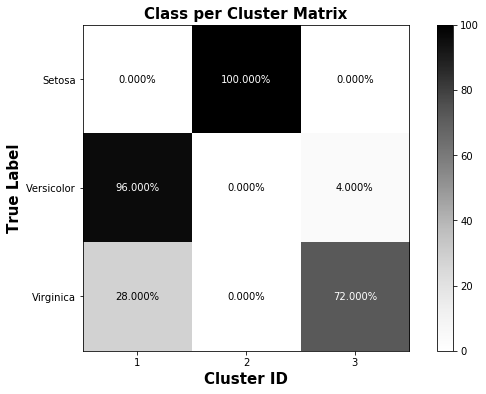

In [3]:
n_clusters = 3
n_classes = 3
kmeans = KMeans(n_clusters=n_clusters).fit(data)
output = kmeans.predict(data)

mat_cluster_class = np.zeros([n_classes,n_clusters])

for iclass in range(n_classes):
    for iclus in range(n_clusters):
        mat_cluster_class[iclass][iclus] = 100.*(float(sum(output[trgt==iclass]==iclus))
                                            /float(sum(trgt==iclass)))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_aspect(1)

im = ax.imshow(mat_cluster_class, interpolation='nearest', cmap=plt.cm.Greys,clim=(0.0, 100.0))

width, height = mat_cluster_class.shape

for x in xrange(width):
    for y in xrange(height):
        if mat_cluster_class[x][y] < 50.:
            ax.annotate('%1.3f%%'%(mat_cluster_class[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')
        else:
            ax.annotate('%1.3f%%'%(mat_cluster_class[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',color='white')

ax.set_title('Class per Cluster Matrix',fontweight='bold',fontsize=15)
fig.colorbar(im)

tick_marks = np.arange(len(iris_labels))
ax.xaxis.set_ticks(range(n_clusters))
ax.xaxis.set_ticklabels(range(1,n_clusters+1,1))

ax.yaxis.set_ticks(tick_marks)
ax.yaxis.set_ticklabels(iris_labels)

ax.set_ylabel('True Label',fontweight='bold',fontsize=15)
ax.set_xlabel('Cluster ID',fontweight='bold',fontsize=15)


# choose most prob class in each cluster
mop_class = np.argmax(mat_cluster_class,axis=1)


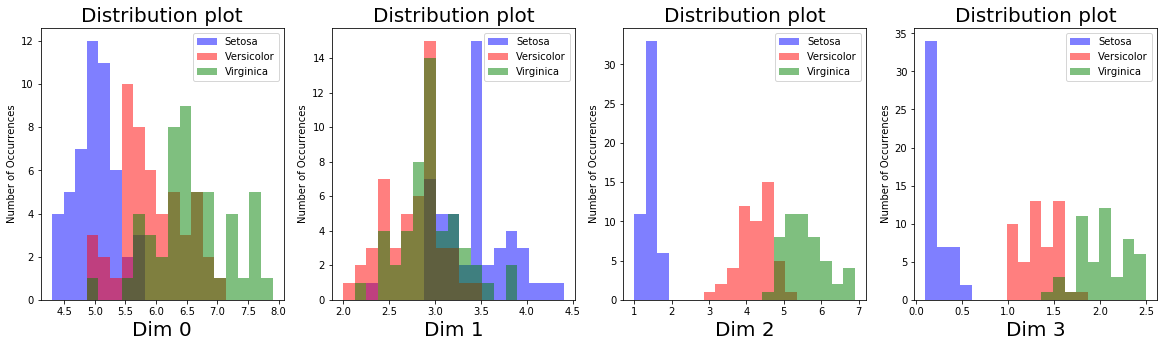

In [4]:
fig, ax = plt.subplots(figsize=(20,5),nrows=1, ncols=data.shape[1])

m_colors = ['b','r','g']

for iclass in range(n_classes):
    for idim in range(data.shape[1]):
        n_bins = np.linspace(data[:,idim].min(),data[:,idim].max(),20)
        n, bins, patches = ax[idim].hist(data[trgt==iclass,idim],
                                         bins=n_bins,fc=m_colors[iclass],
                                         alpha=0.5,
                                         label='%s'%(iris_labels[iclass]))
        ax[idim].set_title('Distribution plot', fontsize=m_font_size)
        ax[idim].set_xlabel('Dim %i'%(idim),fontsize=m_font_size)
        ax[idim].set_ylabel('Number of Occurrences')
        ax[idim].legend()
        

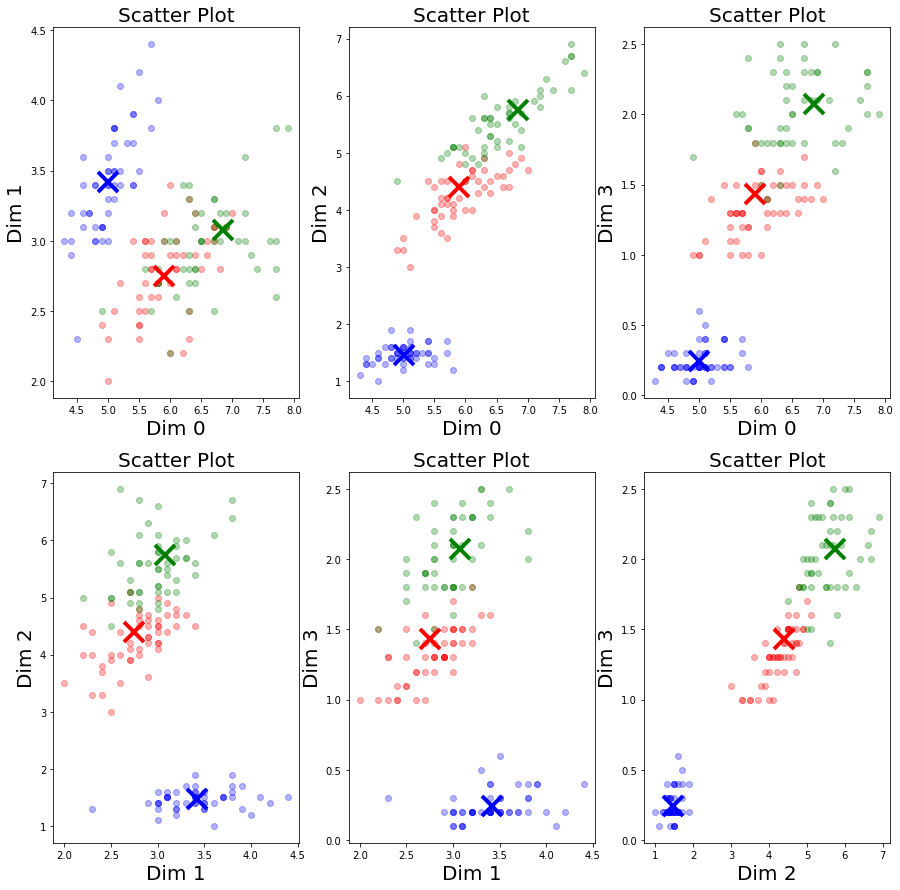

In [5]:
m_colors = ['b','r','g']

irow = 0
n_rows = 2
icolumn = 0
n_columns = 3

fig, ax = plt.subplots(figsize=(15,15),nrows=n_rows, ncols=n_columns)

for idim in range(data.shape[1]-1):
    for jdim in range(idim+1,data.shape[1]):
        for iclass in range(n_classes):
            ax[irow,icolumn].plot(data[trgt==iclass,idim],
                                 data[trgt==iclass,jdim],
                                 'o',alpha=0.3,color=m_colors[iclass])
        for iclus in range(n_clusters):
            ax[irow,icolumn].plot(kmeans.cluster_centers_[iclus][idim],
                                  kmeans.cluster_centers_[iclus][jdim],
                                  'x',markeredgecolor=m_colors[mop_class[iclus]],
                                  markersize=20,mew=4)
            
        ax[irow,icolumn].set_title('Scatter Plot', fontsize=m_font_size)
        ax[irow,icolumn].set_xlabel('Dim %i'%(idim),fontsize=m_font_size)
        ax[irow,icolumn].set_ylabel('Dim %i'%(jdim),fontsize=m_font_size)
        if icolumn+1 == n_columns:
            icolumn = 0
            irow = irow+1
        else:
            icolumn = icolumn+1